In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\plasma_processed.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\dataset\serum_processed.csv')
plasma = plasma.drop(['Unnamed: 0'], axis=1)
serum = serum.drop(['Unnamed: 0'], axis=1)
plasma

,1_5-anhydroglucitol,1-monostearin,2_3-dihydroxybutanoic acid NIST,2_4-diaminobutyric acid,2-deoxyerythritol,2-deoxytetronic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyhippuric acid,2-hydroxyvaleric acid,...,tryptophan,tyrosine,UDP-glucuronic acid,urea,uric acid,uridine,valine,xylitol,xylose,Class
0,9483,103,101,963,389,123,20744,139,36,955,...,27450,52403,73,255067,10057,63,157332,154,1380,disease
1,27468,207,155,335,227,178,8611,78,91,103,...,17898,37179,157,180080,8386,118,103083,324,929,disease
2,13976,86,78,176,152,83,22792,92,97,1010,...,29503,30670,211,138861,15822,119,92045,253,610,disease
3,19449,178,104,467,270,157,29418,123,92,289,...,16501,27573,71,183633,14024,102,97349,223,746,disease
4,17209,258,103,979,314,211,16713,76,42,1126,...,24023,30096,222,255081,23154,58,159671,189,2022,disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25149,184,154,444,142,244,20728,51,128,186,...,30518,36411,114,226793,17880,57,114920,252,856,control
78,24181,142,135,786,226,146,10688,64,59,80,...,23731,26506,110,365044,29018,61,127248,359,1003,control
79,23848,118,65,132,352,294,10077,42,56,867,...,30277,35764,158,327943,19736,76,78152,453,1279,control
80,13848,97,65,881,444,122,14869,75,203,1104,...,14930,18921,2176,323303,17479,108,96830,1450,1045,control


In [3]:
plasma.dtypes

1_5-anhydroglucitol                 int64
1-monostearin                       int64
2_3-dihydroxybutanoic acid NIST     int64
2_4-diaminobutyric acid             int64
2-deoxyerythritol                   int64
                                    ...  
uridine                             int64
valine                              int64
xylitol                             int64
xylose                              int64
Class                              object
Length: 159, dtype: object

In [4]:
from scipy import stats

pearson_p = []
for i in plasma.columns:
    if plasma[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(plasma[i], plasma['Class'].map({"control": 0, "disease": 1}))
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Features', 'Pearson Coefficient', 'p-Value'])
# pearson_p_df

In [5]:
pearson_p_final = []
for i in range(158):
    if pearson_p_df.loc[i, 'p-Value'] < 0.01:
        pearson_p_final.append(pearson_p_df.loc[i, 'Features'])
len(pearson_p_final)

22

# Serum

In [6]:
pearson_p_serum = []
for i in serum.columns:
    if serum[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(serum[i], serum['Class'].map({"control": 0, "disease": 1}))
        pearson_p_serum.append([i, pearson_coef, p_value])
pearson_p_df_serum = pd.DataFrame(pearson_p_serum, columns=['Features', 'Pearson Coefficient', 'p-Value'])
# pearson_p_df_serum

In [7]:
pearson_p_final_serum = []
for i in range(158):
    if pearson_p_df_serum.loc[i, 'p-Value'] < 0.01:
        pearson_p_final_serum.append(pearson_p_df_serum.loc[i, 'Features'])
len(pearson_p_final_serum)

10

In [8]:
imp0 = pearson_p_final
imp1 = pearson_p_final_serum

## Merge the datasets with important features of both 1st & 2nd aprroaches

In [9]:
plasma1 = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/plasma(Specific Metabolics)_final.csv')
plasma2 = plasma[imp0]
plasma_mix = pd.concat([plasma1, plasma2], axis=1)
plasma_mix = plasma_mix.loc[:,~plasma_mix.columns.duplicated()].drop(['Unnamed: 0', 'Class'], axis=1)
plasma_mix

,asparagine,benzoic acid,tryptophan,uric acid,alpha-ketoglutarate,citrulline,glutamine,malic acid,methionine sulfoxide,3-phosphoglycerate,...,aspartic acid,lactic acid,maltose,maltotriose,phenol,phosphoethanolamine,pyrophosphate,pyruvic acid,taurine,N-methylalanine
0,-0.384776,-1.305536,0.523924,-1.016102,0.512135,-0.326638,-0.190839,0.756656,0.191187,-0.493834,...,0.022548,-0.042836,-0.338804,-1.207098,-0.099283,0.034358,-0.273237,1.375625,0.414720,9576
1,0.947427,-0.462690,-0.898525,-1.243045,-0.392098,0.687196,1.044991,0.094793,-0.468097,0.922548,...,0.395145,0.154308,-0.294908,-0.127933,0.216627,-0.830514,-0.405431,0.290328,-0.157190,5239
2,0.692741,-0.487775,0.829649,-0.233142,0.353377,-0.563638,0.355438,0.064009,-0.711349,0.186030,...,0.184241,1.064361,0.235490,0.675167,0.984663,0.021254,0.950369,-0.192526,0.829635,7139
3,0.349894,1.682051,-1.106561,-0.477333,-0.751031,-0.994847,1.152050,-0.413148,-0.654514,0.327668,...,-0.350049,0.526588,-0.192487,-0.378901,0.687592,-0.188412,-0.592977,-0.663066,1.246152,17227
4,0.297651,-1.197672,0.013588,0.762636,-0.143607,0.766196,-0.305898,0.756656,0.120711,0.596780,...,0.012003,-0.325137,-0.009591,1.428073,-0.273178,0.322649,0.521378,-0.094013,0.075899,13572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.771106,-0.628249,0.980799,0.046360,-0.295463,0.078237,1.063280,-0.967265,0.327590,-0.890421,...,-0.821068,-0.722605,-0.353435,-0.378901,-0.678933,-0.450494,-0.956782,-0.116747,-0.373459,12947
78,-0.427224,-1.057197,-0.029896,1.559041,-0.640590,-0.408930,-0.134892,-0.674814,-0.365794,0.355996,...,-0.733191,0.644590,-0.188829,-0.604773,0.791929,-0.424286,-0.221161,-0.514587,-0.233285,11974
79,-0.103969,1.496424,0.944910,0.298428,0.781335,0.914321,1.465637,1.218420,0.384425,-0.465506,...,-0.522287,-0.532977,-0.349777,0.047745,-0.444175,-0.240828,-0.666904,-0.357819,-0.544071,6210
80,-1.220668,0.896900,-1.340508,-0.008101,-0.136704,-1.169305,-1.386388,-0.089913,0.382151,-0.777110,...,-0.673435,-0.460003,-0.499752,-0.830645,-0.180434,-0.437390,-0.918180,-0.103486,-1.054304,12718


In [10]:
serum1 = pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/Approach 1/serum(Specific Metabolics)_final.csv')
serum2 = serum[imp1]
serum_mix = pd.concat([serum1, serum2], axis=1)
serum_mix = serum_mix.loc[:,~serum_mix.columns.duplicated()].drop(['Unnamed: 0', 'Class'], axis=1)
serum_mix

,cholesterol,lactic acid,N-methylalanine,phenylalanine,aspartic acid,deoxypentitol,glutamic acid,malic acid,phenol,taurine
0,0.123632,0.094923,-0.186546,-0.343844,-0.413389,-1.267860,-0.211881,0.470533,-0.121362,0.005331
1,1.163621,0.676247,-1.136707,0.299430,0.176392,0.007955,-0.477977,-0.318708,0.446950,0.857427
2,1.335657,1.634194,-0.719219,-0.855227,-0.141775,0.573702,0.751584,-0.127763,1.341798,0.035604
3,1.049709,0.264560,1.632207,-0.053586,0.282325,-0.038228,-0.312322,0.063183,0.251028,0.783080
4,-0.756814,-0.827738,0.855814,-0.041329,-0.557444,-0.615520,-0.803098,0.126831,-1.471972,-0.745261
...,...,...,...,...,...,...,...,...,...,...
77,0.441813,-0.907398,0.526569,-0.124189,-0.613526,0.464016,0.207017,-0.267790,-0.764708,-1.015491
78,-1.019159,0.247532,0.626430,-0.229359,0.184822,0.198462,0.010182,0.317777,0.087065,-0.488831
79,-0.202846,-0.612624,-0.830203,0.067763,-0.677673,-0.240280,-0.639585,0.114102,-0.474300,-0.785773
80,-0.456752,-0.257315,1.011784,-0.853511,-0.424019,-0.471197,-0.492257,-0.496924,-1.722085,-0.368184


In [11]:
# necessary functions
from sklearn.decomposition import PCA
labels = np.reshape(plasma['Class'].to_numpy(), (82,1))

def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)
    return pca_concatenate

def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)
    return tsne_concatenate
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

# Lzypredict

In [12]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [14]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 20, 22, 23]:
    
    if k==0:
        name = ['Plasma(mix)', 'Serum(mix)']
        dfs = [plasma_mix, serum_mix]
    
    elif k==22 or k==23:
        k -= 20
        name = [f'tsne{k}_plasma(mix)', f'tsne{k}_serum(mix)']
        vars()[f'tsne{k}_plasma'] = tsne_analysis(plasma_mix, k)
        vars()[f'tsne{k}_plasma_df'] = make_dataframe(vars()[f'tsne{k}_plasma'], k)
        
        vars()[f'tsne{k}_serum'] = pca_analysis(serum_mix, k)
        vars()[f'tsne{k}_serum_df'] = make_dataframe(vars()[f'tsne{k}_serum'], k)
        
        dfs = [vars()[f'tsne{k}_plasma_df'], vars()[f'tsne{k}_serum_df']]
    
    else:
        if k<=5:
            name = [f'pca{k}_plasma(mix)', f'pca{k}_serum(mix)']
            vars()[f'pca{k}_plasma'] = pca_analysis(plasma_mix, k)
            vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

            vars()[f'pca{k}_serum'] = pca_analysis(serum_mix, k)
            vars()[f'pca{k}_serum_df'] = make_dataframe(vars()[f'pca{k}_serum'], k)

            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
        else:
            name = [f'pca{k}_plasma(mix)']
            vars()[f'pca{k}_plasma'] = pca_analysis(plasma_mix, k)
            vars()[f'pca{k}_plasma_df'] = make_dataframe(vars()[f'pca{k}_plasma'], k)

            dfs = [vars()[f'pca{k}_plasma_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
        result = []
        if data.columns[-1]=='Class':
            X = data.drop('Class', axis=1)
        else:
            X = data
        y = plasma['Class'].copy()
        y = y.map({"control": 0, "disease": 1})
        rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)

        for train_index, test_index in rs.split(X):
            clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            scaler = RobustScaler()

            cols = X_train.columns
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            X_train = pd.DataFrame(X_train, columns=[cols])
            X_test = pd.DataFrame(X_test, columns=[cols])

            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            result.append(models)
        #     print(result)

        acc = []
        for i in range(10):
            acc.append(result[i].iloc[0]['Balanced Accuracy'])

        print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
        accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  7%|▋         | 2/29 [00:00<00:01, 18.68it/s]


Plasma(mix): 0.8760975135975138


  7%|▋         | 2/29 [00:00<00:01, 19.23it/s]


Serum(mix): 0.8667929292929294


  7%|▋         | 2/29 [00:00<00:01, 17.09it/s]


pca2_plasma(mix): 0.8918123543123544


  3%|▎         | 1/29 [00:00<00:03,  7.04it/s]


pca2_serum(mix): 0.8197115384615383


  7%|▋         | 2/29 [00:00<00:01, 18.69it/s]


pca3_plasma(mix): 0.88486790986791


  3%|▎         | 1/29 [00:00<00:03,  8.55it/s]


pca3_serum(mix): 0.8374660062160062


  7%|▋         | 2/29 [00:00<00:01, 18.52it/s]


pca4_plasma(mix): 0.8813956876456878


  7%|▋         | 2/29 [00:00<00:01, 18.69it/s]


pca4_serum(mix): 0.8510926573426574


  7%|▋         | 2/29 [00:00<00:01, 16.67it/s]


pca5_plasma(mix): 0.8908022533022534


  7%|▋         | 2/29 [00:00<00:01, 17.54it/s]


pca5_serum(mix): 0.8618881118881119


  7%|▋         | 2/29 [00:00<00:01, 17.86it/s]


pca10_plasma(mix): 0.8706585081585082


  7%|▋         | 2/29 [00:00<00:01, 17.39it/s]


pca15_plasma(mix): 0.8820901320901322


100%|██████████| 29/29 [00:00<00:00, 47.08it/s]



pca20_plasma(mix): 0.875456487956488


  7%|▋         | 2/29 [00:00<00:01, 18.01it/s]


tsne2_plasma(mix): 0.8389131701631701


100%|██████████| 29/29 [00:00<00:00, 49.83it/s]



tsne2_serum(mix): 0.8197115384615383


  7%|▋         | 2/29 [00:00<00:01, 16.81it/s]


tsne3_plasma(mix): 0.709822261072261


100%|██████████| 29/29 [00:00<00:00, 44.28it/s]


tsne3_serum(mix): 0.8374660062160062


In [15]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])
# accuracy_df.to_csv('accuracy_mix.csv', index=False)
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(mix),0.8760975135975138
1,Serum(mix),0.8667929292929294
2,pca2_plasma(mix),0.8918123543123544
3,pca2_serum(mix),0.8197115384615383
4,pca3_plasma(mix),0.88486790986791
5,pca3_serum(mix),0.8374660062160062
6,pca4_plasma(mix),0.8813956876456878
7,pca4_serum(mix),0.8510926573426574
8,pca5_plasma(mix),0.8908022533022534
9,pca5_serum(mix),0.8618881118881119


In [16]:
final_acc = pd.concat([accuracy_df, pd.read_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_final.csv')], ignore_index=True)
# final_acc.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/final and best approach/accuracy_final.csv')
final_acc

,Processed Dataset,Accuracy,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1
0,Plasma(mix),0.8760975135975138,nan,nan,nan
1,Serum(mix),0.8667929292929294,nan,nan,nan
2,pca2_plasma(mix),0.8918123543123544,nan,nan,nan
3,pca2_serum(mix),0.8197115384615383,nan,nan,nan
4,pca3_plasma(mix),0.88486790986791,nan,nan,nan
...,...,...,...,...,...
61,pca20_plasma(Specific Metabolics),0.88,44.00,27.00,13.00
62,tsne2_plasma(Specific Metabolics),0.85,45.00,28.00,14.00
63,tsne2_serum(Specific Metabolics),0.86,46.00,29.00,15.00
64,tsne3_plasma(Specific Metabolics),0.78,47.00,30.00,16.00


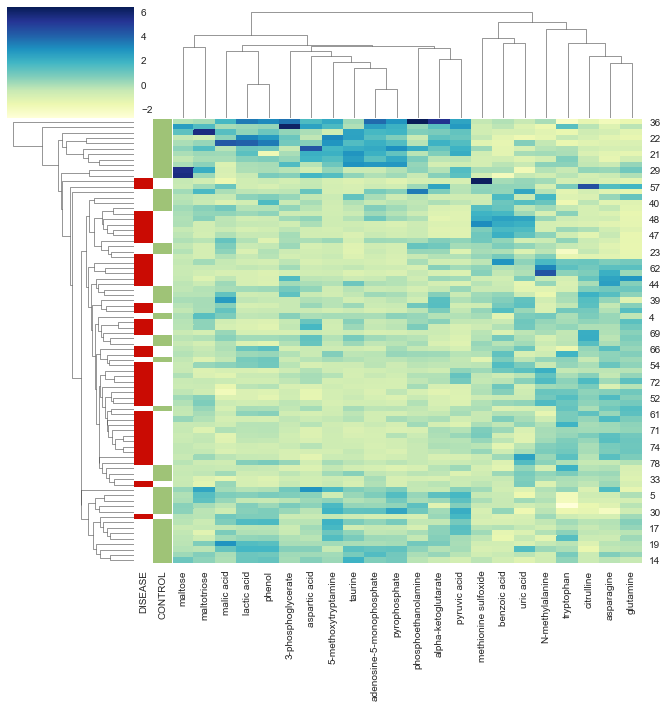

In [28]:
# Data set
import seaborn as sns
final_df1 = plasma.copy()
Class = plasma["Class"].copy()
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(plasma[imp0], cmap='YlGnBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('plotting/clustermap_exploratory_plasma_mix.JPG')
plt.show()

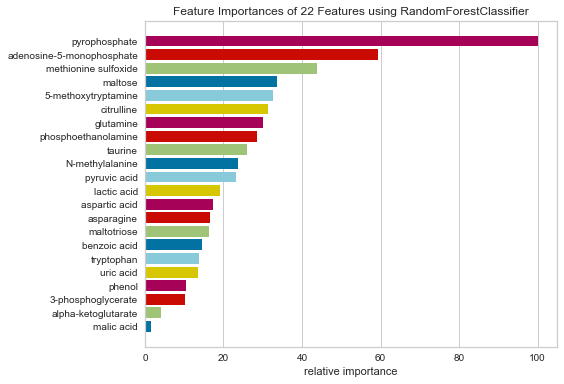

<AxesSubplot:title={'center':'Feature Importances of 22 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = plasma_mix
y = plasma['Class'].copy()
y = y.map({"control": 1, "disease": 0})

model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

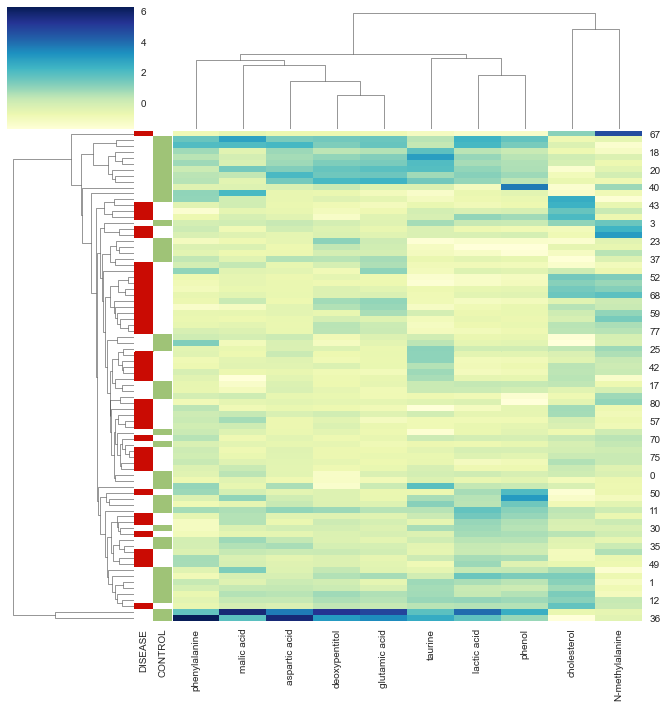

In [27]:
# Data set
import seaborn as sns
final_df1 = serum_mix.copy()
Class = y
# final_df = final_df.set_index('Metabolics')

lut = dict(zip(Class.unique(), "grb"))
row_colors = Class.map(lut)
df_colors = pd.DataFrame(data={'DISEASE': row_colors[row_colors == 'r'], 'CONTROL': row_colors[row_colors == 'g']}) 
# Default plot
g = sns.clustermap(serum[imp1], cmap='YlGnBu', row_colors=df_colors, z_score=1)      #z_score->standardize; standard_cale->normalize
g.fig.subplots_adjust(right=0.9)
g.ax_cbar.set_position((0.7, .2, .03, .4), 'horizontal')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
# Show the graph
# Show the graph
plt.savefig('plotting/clustermap_exploratory_serum_mix.JPG')
plt.show()

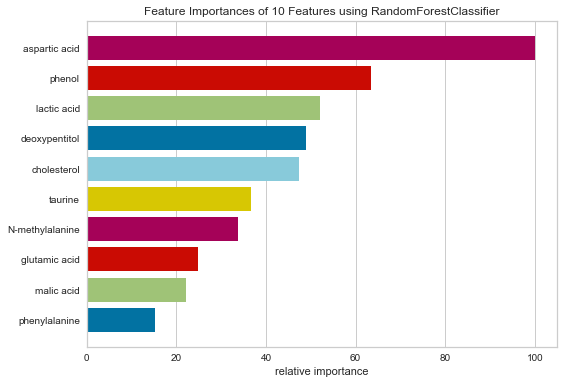

<AxesSubplot:title={'center':'Feature Importances of 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [20]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set
X = serum_mix
# y = final_df1['Class'].copy()
y = Class
model = RandomForestClassifier(n_estimators=17)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()